# Clustering - Algorithm
- For Project 4, the goal is to get some experience working with clustering.
- You have the freedom to define your own problem and choose a dataset. However, your problem definition needs to relate to clustering.

- The writing will be critical here, as the main goal will be to discuss your process, why you take certain steps (e.g., what preprocessing steps and why), and tell a story around your data and insights gained through both modeling (working with the clustering algorithms we learned about) and visualizations. Thus, your writing should portray your critical thinking about the data, the process, and what knowledge you find.

- See the rubric for more information on the parts required.
- The project should be completed as a part of your portfolio and have all the required parts.

- Make sure the link to your Project 4 is on Canvas for peer critiques (the discussion board will be posted closer to the peer critique date). We will then do peer critique in class.

### Import Packages

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Import Dataset

In [60]:
df = pd.read_csv('pricerunner_aggregate.csv')
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


## Exploratory Data Analysis
- Dataset Information
- Description Dataset
- N-Unique values
- Checking for a missing values
- Object column in dataset

### Dataset Information

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      35311 non-null  int64 
 1   Product Title   35311 non-null  object
 2   Merchant ID     35311 non-null  int64 
 3   Cluster ID      35311 non-null  int64 
 4   Cluster Label   35311 non-null  object
 5   Category ID     35311 non-null  int64 
 6   Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


### Description Dataset

In [62]:
df.describe()

,Product ID,Merchant ID,Cluster ID,Category ID
count,35311.000000,35311.000000,35311.000000,35311.000000
mean,26150.800176,120.501883,30110.687633,2618.142930
std,13498.191220,117.045557,18410.265642,3.600708
min,1.000000,1.000000,1.000000,2612.000000
25%,14958.500000,17.000000,6123.000000,2615.000000
50%,27614.000000,75.000000,40630.000000,2619.000000
75%,37508.500000,253.000000,44059.000000,2622.000000
max,47358.000000,371.000000,47525.000000,2623.000000


### N - Unique values

In [63]:
df.nunique()

Product ID        35311
Product Title     30993
Merchant ID         306
Cluster ID        13233
Cluster Label     12849
Category ID          10
Category Label       10
dtype: int64

### Checking for missing values

In [64]:
df.isnull().sum()

Product ID        0
Product Title     0
Merchant ID       0
Cluster ID        0
Cluster Label     0
Category ID       0
Category Label    0
dtype: int64

### Object columns in Dataset

In [65]:
df.select_dtypes('object').columns

Index(['Product Title', 'Cluster Label', 'Category Label'], dtype='object')

## Data Visualization
- Pie chart count the number of products per category label
- Bar plot showing the count of products per category
- Box plot showing the distribution of merchant IDs
- Scatter plot showing the relationship between product ID and category ID

### Pie Chart Count the number of products per category label

- Critical Thinking: The pie chart visualizes the distribution of products across different categories, providing a clear overview of the proportion of products in each category.

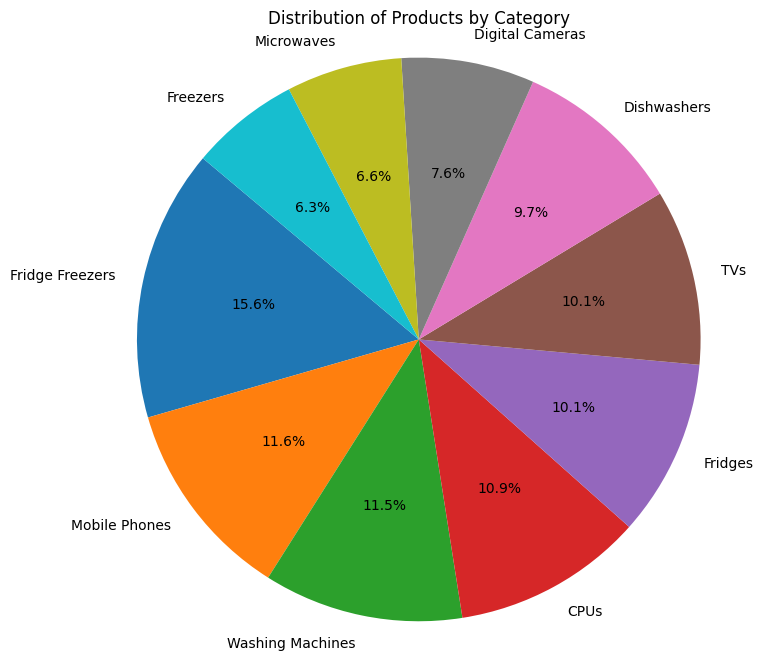

In [66]:
category_counts = df['Category Label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Bar plot showing the count of products per category label

- Critical Thinking: The countplot visually represents the number of products within each category, offering a straightforward comparison of product counts across different categories.

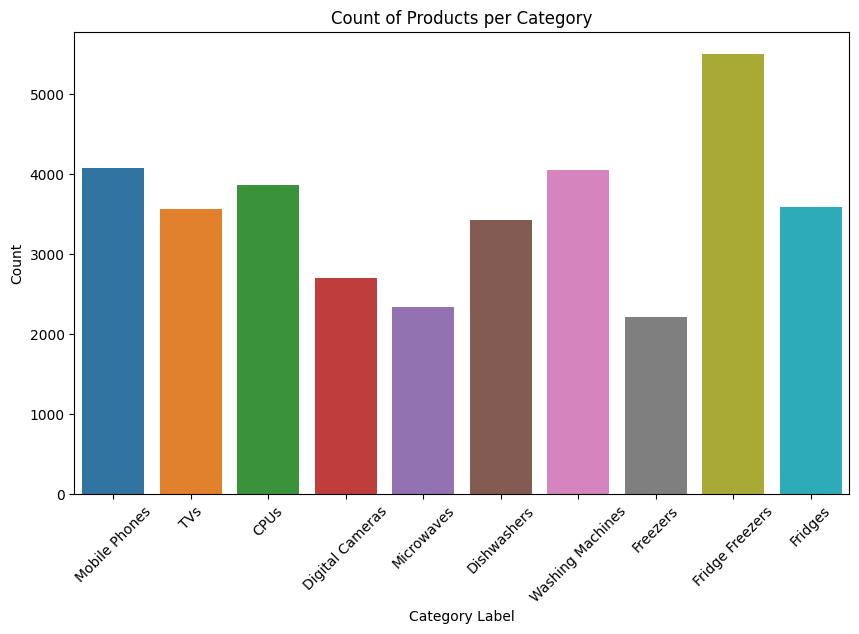

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category Label', data=df)
plt.title('Count of Products per Category')
plt.xlabel('Category Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Box plot showing the distribution of merchant IDs

- Critical Thinking: The boxplot displays the distribution of products among different merchant IDs, providing insights into the variability and spread of product counts across various merchants.

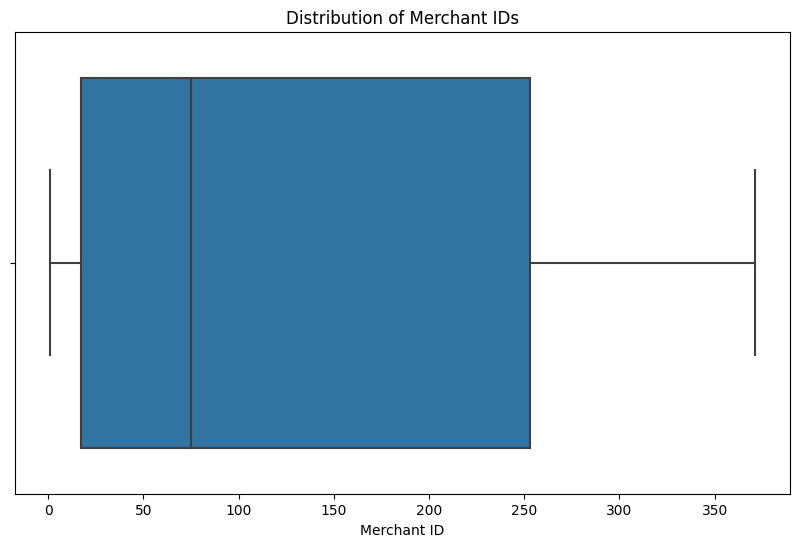

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Merchant ID', data=df)
plt.title('Distribution of Merchant IDs')
plt.xlabel('Merchant ID')
plt.show()

### Scatter plot showing the relationship between product ID and category ID

- Critical Thinking: The scatter plot illustrates the relationship between product IDs and category IDs, offering a visual exploration of how products are distributed across different categories and identifying any potential patterns or correlations between them.

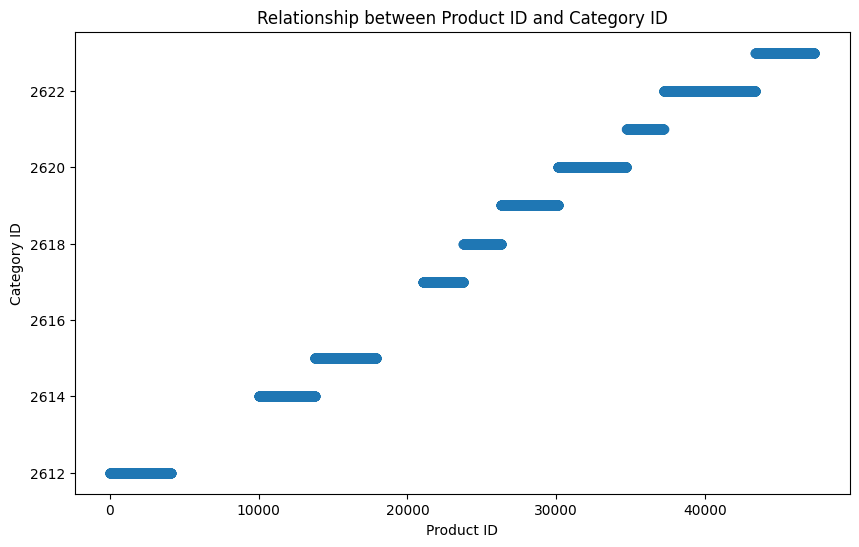

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Product ID'], df['Category ID'], alpha=0.5)
plt.title('Relationship between Product ID and Category ID')
plt.xlabel('Product ID')
plt.ylabel('Category ID')
plt.show()

## Data Pre-Processing
- Label Encoding 
- Standardize numerical Featrures
- Principal component analysis

### Label Encoding

- Critical Thinking: These lines of code transform categorical variables ('Cluster Label' and 'Category Label') into numerical representations using label encoding, allowing machine learning algorithms to process them effectively.

In [70]:
label_encoder = LabelEncoder()
df['Cluster Label'] = label_encoder.fit_transform(df['Cluster Label'])
df['Category Label'] = label_encoder.fit_transform(df['Category Label'])

### Select features for clustering

In [71]:
features = ['Cluster Label', 'Category Label']

### Standardize numerical features

- Critical Thinking: These lines of code standardize the numerical features in the dataset, ensuring that all features have a mean of 0 and a standard deviation of 1. This preprocessing step helps improve the performance of machine learning algorithms by bringing all features to the same scale.

In [72]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

### Apply PCA for dimensionality reduction

- Critical Thinking: These lines of code perform dimensionality reduction using Principal Component Analysis (PCA), reducing the number of features to two principal components while preserving the variance in the data. This allows for a simplified visualization and analysis of the data.

In [73]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_scaled)

## Model Building
- Apply K-means clustering
- Visualize the clustering results

### Apply k-means clustering

- Critical Thinking: These lines of code apply the k-means clustering algorithm to partition the data into 8 clusters based on the scaled features. Each data point is assigned to the cluster with the nearest centroid, allowing for the identification of distinct groups within the dataset.

In [74]:
kmeans = KMeans(n_clusters=8, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

### Visualize the clustering results

- Critical Thinking: These lines of code create a scatter plot to visualize the clustering results after dimensionality reduction using PCA. Each point in the plot represents a data point in the reduced feature space (two principal components), with its color indicating the assigned cluster according to the k-means algorithm. This visualization helps understand the distribution and separation of data points in the reduced feature space.

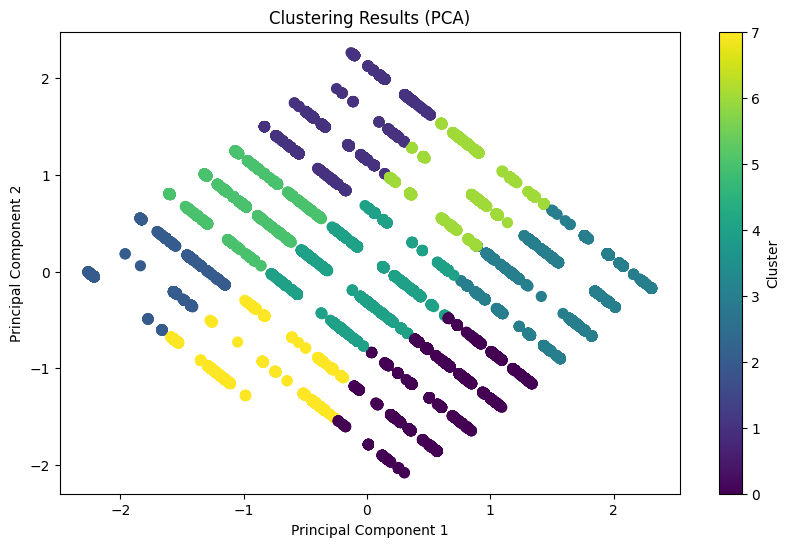

In [75]:

plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()